# Importing Neccessary Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score

### Loading the dataset

In [2]:
data = pd.read_csv("data.csv")
data.head(2)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0        1.5         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0        2.5         3650      9050   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   

   yr_renovated                street       city  statezip country  
0          2005  18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0       709 W Blaine St    Seattle  WA 98119     USA

### Shape of Data Before Preprocessing

In [3]:
data.shape

(4600, 18)

### Checking for Null Values

In [4]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Droping columns that seems unimportant for predicting price of a house

In [5]:
df = data.drop(['date', 'waterfront', 'view', 'sqft_basement', 'yr_renovated','sqft_lot', 'sqft_above', 'street', 'country'], axis=1)
df.head()

price  bedrooms  bathrooms  sqft_living  floors  condition  yr_built  \
0   313000.0       3.0       1.50         1340     1.5          3      1955   
1  2384000.0       5.0       2.50         3650     2.0          5      1921   
2   342000.0       3.0       2.00         1930     1.0          4      1966   
3   420000.0       3.0       2.25         2000     1.0          4      1963   
4   550000.0       4.0       2.50         1940     1.0          4      1976   

        city  statezip  
0  Shoreline  WA 98133  
1    Seattle  WA 98119  
2       Kent  WA 98042  
3   Bellevue  WA 98008  
4    Redmond  WA 98052

### Shape of Data After Removing Un-neccessary columns

In [6]:
df.shape

(4600, 9)

## Pre_Processing Starts Here

In [7]:
#Removing all the rows where price is eaquals to '0'
df = df[df['price'] != 0]

- Checking and Removing Outliers from **'Price'** Column

In [8]:

# Calculate IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count number of outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of outliers in 'price': {len(outliers)}")

# Remove outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Check new shape
print("After removing outliers:", df.shape)

Number of outliers in 'price': 240
After removing outliers: (4311, 9)


- Converting Less numbers of bedrooms like` 8.0 and 9.0 which contains only 1` value into Bigger value

In [9]:
df = df[df['bedrooms'] != 0]
df['bedrooms'] = df['bedrooms'].apply(lambda x: 7 if x > 7 else x)
print(df['bedrooms'].value_counts())

bedrooms
3.0    1981
4.0    1394
2.0     557
5.0     282
6.0      47
1.0      37
7.0      12
Name: count, dtype: int64


- Similarily did with `bathrooms` column

In [10]:
bathroom_counts = df['bathrooms'].value_counts()
rare_bathrooms = bathroom_counts[bathroom_counts <= 5].index
df['bathrooms'] = df['bathrooms'].apply(lambda x: 6 if x in rare_bathrooms else x)
df['bathrooms'].value_counts()

bathrooms
2.50    1144
1.00     735
1.75     619
2.00     420
2.25     397
1.50     284
2.75     256
3.00     145
3.50     118
3.25     102
3.75      25
0.75      17
4.00      15
4.50      12
6.00      11
4.25      10
Name: count, dtype: int64

- Checking and Removing outliers from **sqft_living** living column

In [11]:
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['sqft_living'] < lower_bound) | (df['sqft_living'] > upper_bound)]
print(f"Number of outliers in sqft_living: {len(outliers)}")
print(outliers[['sqft_living']].head())

#Removing 
df = df[(df['sqft_living'] >= lower_bound) & (df['sqft_living'] <= upper_bound)]

#New shape after Remving outliers
print("After removing outliers:", df.shape)

Number of outliers in sqft_living: 73
     sqft_living
107         4340
143         4420
148         4490
233         4460
388         4230
After removing outliers: (4237, 9)


- 3.5 had only one value in **floors** column so i removed it.

In [12]:
df = df[df['floors'] != 3.5]
df['floors'].value_counts()

floors
1.0    2097
2.0    1583
1.5     413
3.0     119
2.5      24
Name: count, dtype: int64

In [13]:
df['condition'].value_counts()

condition
3    2648
4    1170
5     382
2      30
1       6
Name: count, dtype: int64

- As i did earlier in `bathrooms` and `bedrooms` columns, in **condition** column, Values with less converted into higher numbers.

In [14]:
count_condition = df['condition'].value_counts()
rare_condition = count_condition[count_condition <= 30].index
df['condition'] = df['condition'].apply(lambda x: 5 if x in rare_condition else x)
df['condition'].value_counts()

condition
3    2648
4    1170
5     418
Name: count, dtype: int64

- Made a new column **House_Age** to see how many years old it is.

In [15]:
df['House_Age'] = 2025 - df['yr_built']

- Cities having `less than 10 converted` into **other**

In [16]:
city_counts = df['city'].value_counts()
cities_less_than_ten = city_counts[city_counts <= 10].index
df['city'] = df['city'].apply(lambda x: 'other' if x in cities_less_than_ten else x)



- Removed State of **zip_code** because everyone was same and Converted dtype of **zip_code** into `int64` from object

In [17]:
df['city_code'] = df['statezip'].apply(lambda x:x.split(' ')[1])
df['city_code'] = df['city_code'].apply(lambda x : int(x))
df['city_code'].head()

0    98133
2    98042
3    98008
4    98052
5    98115
Name: city_code, dtype: int64

- Droping two columns because `they've been converted` into **same others and more meaningful**

In [18]:
df1 = df.drop(columns=['yr_built', 'statezip'])


## Final Data ready for ML

In [19]:
df1.head()

price  bedrooms  bathrooms  sqft_living  floors  condition       city  \
0  313000.0       3.0       1.50         1340     1.5          3  Shoreline   
2  342000.0       3.0       2.00         1930     1.0          4       Kent   
3  420000.0       3.0       2.25         2000     1.0          4   Bellevue   
4  550000.0       4.0       2.50         1940     1.0          4    Redmond   
5  490000.0       2.0       1.00          880     1.0          3    Seattle   

   House_Age  city_code  
0         70      98133  
2         59      98042  
3         62      98008  
4         49      98052  
5         87      98115

- Shape of Data After Preprocessing

In [20]:
df1.shape

(4236, 9)

- Checking for null values

In [21]:
df1.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
condition      0
city           0
House_Age      0
city_code      0
dtype: int64

- Info of Data

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4236 entries, 0 to 4599
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4236 non-null   float64
 1   bedrooms     4236 non-null   float64
 2   bathrooms    4236 non-null   float64
 3   sqft_living  4236 non-null   int64  
 4   floors       4236 non-null   float64
 5   condition    4236 non-null   int64  
 6   city         4236 non-null   object 
 7   House_Age    4236 non-null   int64  
 8   city_code    4236 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 330.9+ KB


- Statistical Analysis

In [23]:
df1.describe()

price     bedrooms    bathrooms  sqft_living       floors  \
count  4.236000e+03  4236.000000  4236.000000  4236.000000  4236.000000   
mean   4.811796e+05     3.334278     2.075956  1985.183192     1.487134   
std    2.102579e+05     0.866627     0.704786   734.356035     0.534754   
min    7.800000e+03     1.000000     0.750000   370.000000     1.000000   
25%    3.170000e+05     3.000000     1.750000  1420.000000     1.000000   
50%    4.450000e+05     3.000000     2.250000  1900.000000     1.500000   
75%    6.050000e+05     4.000000     2.500000  2470.000000     2.000000   
max    1.150000e+06     7.000000     6.000000  4130.000000     3.000000   

         condition    House_Age     city_code  
count  4236.000000  4236.000000   4236.000000  
mean      3.473560    54.466714  98080.228754  
std       0.668403    29.543446     52.958899  
min       3.000000    11.000000  98001.000000  
25%       3.000000    29.000000  98034.000000  
50%       3.000000    50.000000  98072.000000  
75%       4.000000    74.000000  98118.000000  
max       5.000000   125.000000  98354.000000

In [24]:
df1['price'].agg(['min','max'])

min       7800.0
max    1150000.0
Name: price, dtype: float64

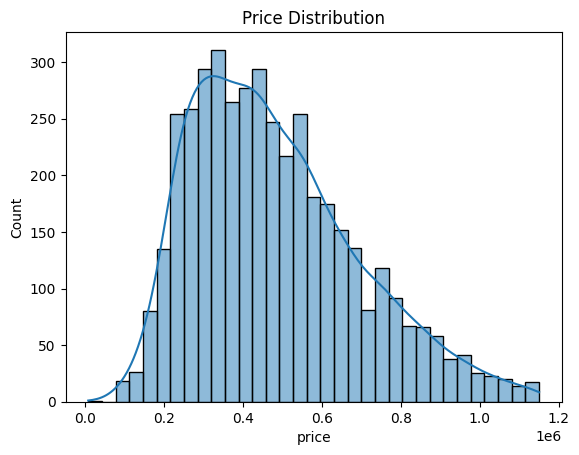

In [25]:

sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()


## Machine_Learning Starts from here:

- Spliting Features and Label 

In [26]:
X = df1.drop('price', axis=1)
y = df1['price']

- Columns in X

In [27]:
pd.set_option('display.width', 1000)
print(X.head())

   bedrooms  bathrooms  sqft_living  floors  condition       city  House_Age  city_code
0       3.0       1.50         1340     1.5          3  Shoreline         70      98133
2       3.0       2.00         1930     1.0          4       Kent         59      98042
3       3.0       2.25         2000     1.0          4   Bellevue         62      98008
4       4.0       2.50         1940     1.0          4    Redmond         49      98052
5       2.0       1.00          880     1.0          3    Seattle         87      98115


- Split the data into **Train_Test**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
numerical_features = [col for col in X.columns if X[col].dtypes in ['int64', 'float64']]
categorical_features = [col for col in X.columns if X[col].dtypes in ['object', 'category']]

print("Numerical:", numerical_features)
print("Categorical:", categorical_features)


Numerical: ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'House_Age', 'city_code']
Categorical: ['city']


- Pre_processing

In [30]:
preprocessing = ColumnTransformer([
    ('num' , StandardScaler() , numerical_features),
    ('cate' , OneHotEncoder() , categorical_features)
])

- PipeLine

In [31]:
pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('model', LinearRegression())
])

In [32]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [33]:
print('r2_score', r2_score(y_test,y_pred))

r2_score 0.7000180824569485


In [34]:
import joblib

# Save the trained pipeline
joblib.dump(pipeline, 'house_price_model.pkl')
print("✅ Model saved successfully!")


✅ Model saved successfully!
